In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Load the Dataset
train_df = pd.read_csv('/content/Train_Data.csv')
test_df = pd.read_csv('/content/Test_Data.csv')
print("Train Data Sample:")
print(train_df.head())

Train Data Sample:
      SEQN  RIAGENDR  PAQ605  BMXBMI  LBXGLU  DIQ010  LBXGLT  LBXIN age_group
0  73564.0       2.0     2.0    35.7   110.0     2.0   150.0  14.91     Adult
1  73568.0       2.0     2.0    20.3    89.0     2.0    80.0   3.85     Adult
2  73576.0       1.0     2.0    23.2    89.0     2.0    68.0   6.14     Adult
3  73577.0       1.0     2.0    28.9   104.0     NaN    84.0  16.15     Adult
4  73580.0       2.0     1.0    35.9   103.0     2.0    81.0  10.92     Adult


In [ ]:
#Preview the dataset
print("\nDataset Info:")
print(train_df.info())
#Basic Info
print("\nSummary:")
print(train_df.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1966 entries, 0 to 1965
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       1954 non-null   float64
 1   RIAGENDR   1948 non-null   float64
 2   PAQ605     1953 non-null   float64
 3   BMXBMI     1948 non-null   float64
 4   LBXGLU     1953 non-null   float64
 5   DIQ010     1948 non-null   float64
 6   LBXGLT     1955 non-null   float64
 7   LBXIN      1957 non-null   float64
 8   age_group  1952 non-null   object 
dtypes: float64(8), object(1)
memory usage: 138.4+ KB
None

Summary:
               SEQN     RIAGENDR       PAQ605       BMXBMI       LBXGLU  \
count   1954.000000  1948.000000  1953.000000  1948.000000  1953.000000   
mean   78683.621801     1.510267     1.825397    27.965400    99.491039   
std     2924.115709     0.500023     0.399449     7.327616    16.774665   
min    73564.000000     1.000000     1.000000    14.500000    63.00000

In [ ]:
# Check missing values
print("\nMissing Values:")
print(train_df.isnull().sum())
# Check for the number of rows and columns
print("Training Set Shape:")
print(train_df.shape)


Missing Values:
SEQN         12
RIAGENDR     18
PAQ605       13
BMXBMI       18
LBXGLU       13
DIQ010       18
LBXGLT       11
LBXIN         9
age_group    14
dtype: int64
Training Set Shape:
(1966, 9)


In [ ]:
# Drop rows with missing target (just in case)
train_df = train_df.dropna(subset=['age_group'])
# Convert 'age_group' to binary (0 = not senior, 1 = senior)
train_df['IsSenior'] = train_df['age_group'].apply(lambda x: 1 if str(x).strip().lower() == 'senior' else 0)


In [ ]:
train_df.head()

,SEQN,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group,IsSenior
0,73564.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,Adult,0
1,73568.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85,Adult,0
2,73576.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14,Adult,0
3,73577.0,1.0,2.0,28.9,104.0,NaN,84.0,16.15,Adult,0
4,73580.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92,Adult,0


In [ ]:
# Drop 'SEQN' (participant ID) and 'age_group' (replaced by IsSenior)
train_df.drop(['SEQN', 'age_group'], axis=1, inplace=True)
test_df.drop(['SEQN'], axis=1, inplace=True)

In [ ]:
# Check class distribution
print("\nTarget Class Balance (IsSenior):")
print(train_df['IsSenior'].value_counts(normalize=True))


Target Class Balance (IsSenior):
IsSenior
0    0.839139
1    0.160861
Name: proportion, dtype: float64


This Tells us that majority(around 84%) people are less than 65 and the rest people are greater than 65

In [ ]:
# Impute missing values (simple median strategy)
train_df.fillna(train_df.median(numeric_only=True), inplace=True)
test_df.fillna(test_df.median(numeric_only=True), inplace=True)

In [ ]:
# Check numeric columns
print("Numeric Features:", train_df.select_dtypes(include=['float64', 'int']).columns.tolist())

Numeric Features: ['RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010', 'LBXGLT', 'LBXIN', 'IsSenior']


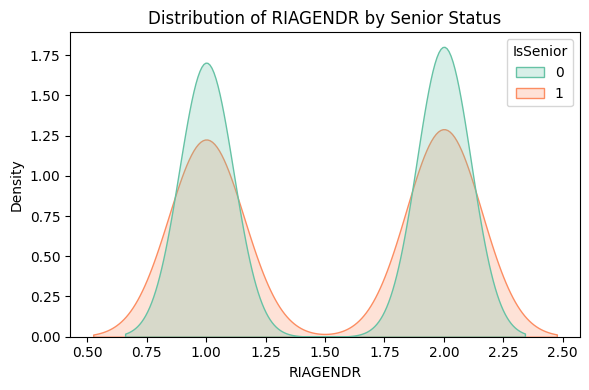

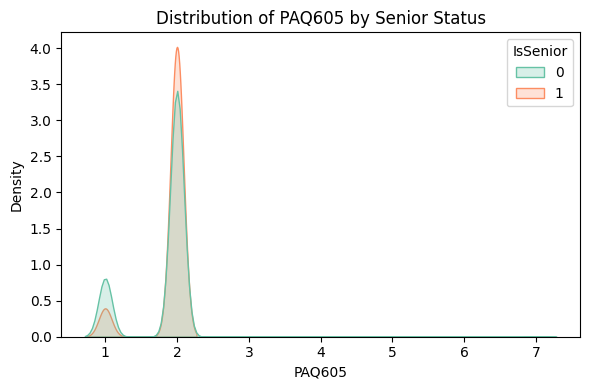

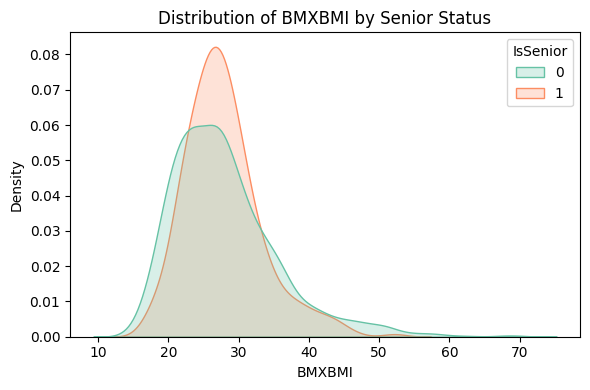

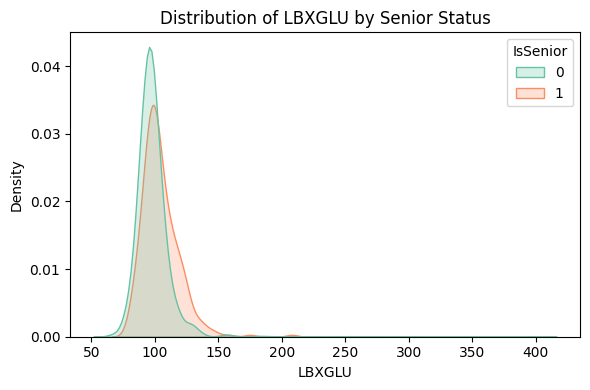

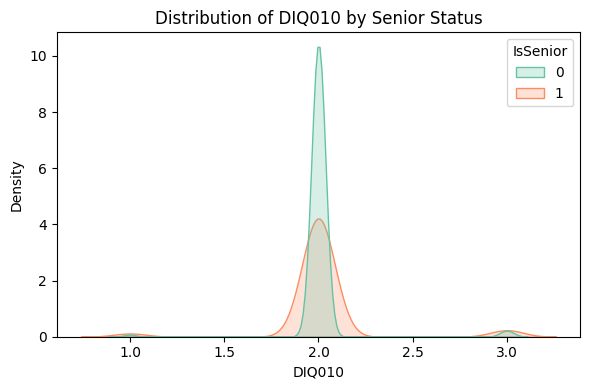

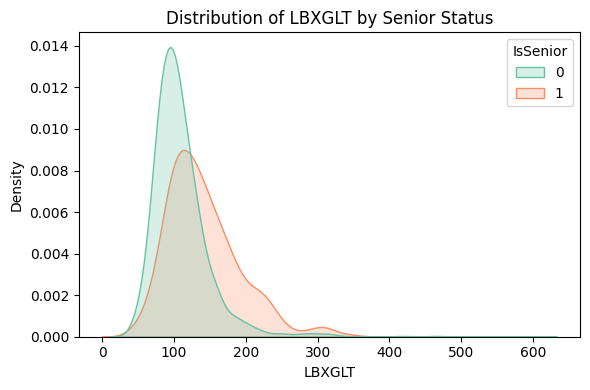

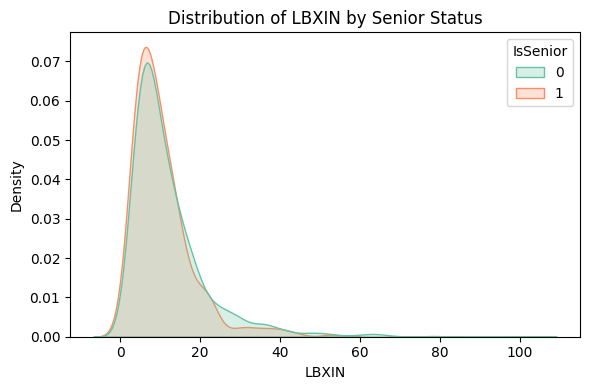

In [ ]:

# Plot distribution for each numeric feature by Senior status
numeric_cols = train_df.drop(columns='IsSenior').columns
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.kdeplot(data=train_df, x=col, hue='IsSenior', fill=True, common_norm=False, palette='Set2')
    plt.title(f"Distribution of {col} by Senior Status")
    plt.tight_layout()
    plt.show()

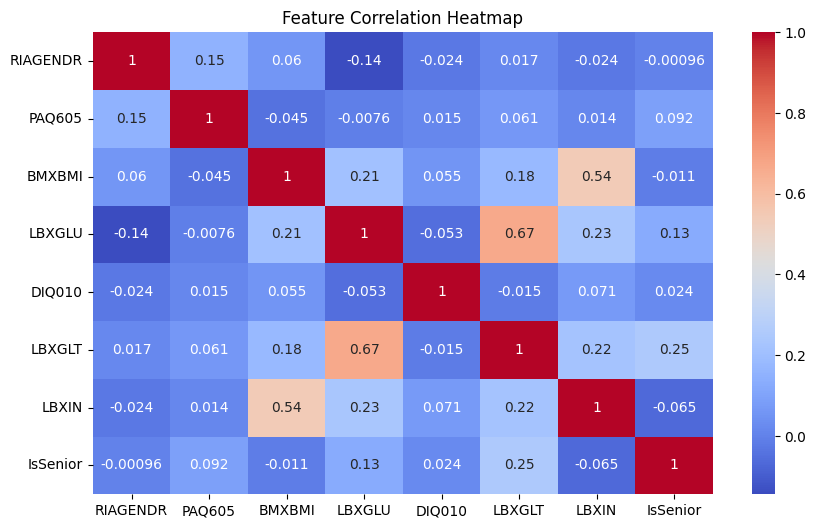

In [ ]:
# Add the target back to see correlation with target
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


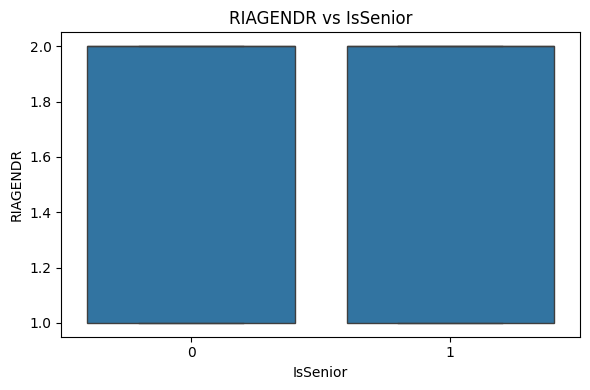

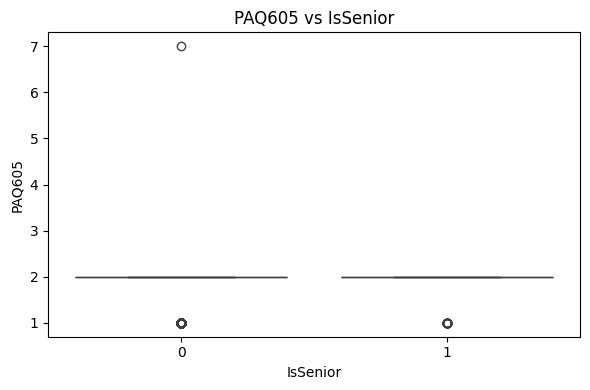

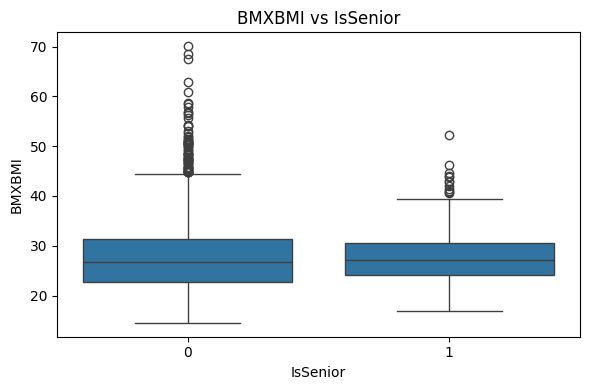

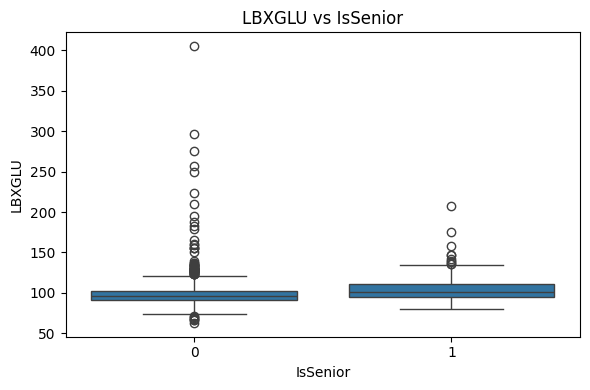

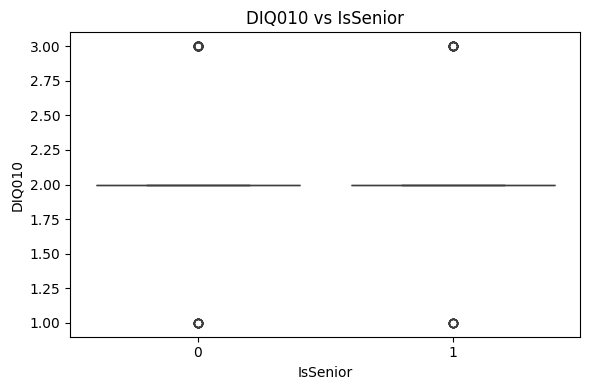

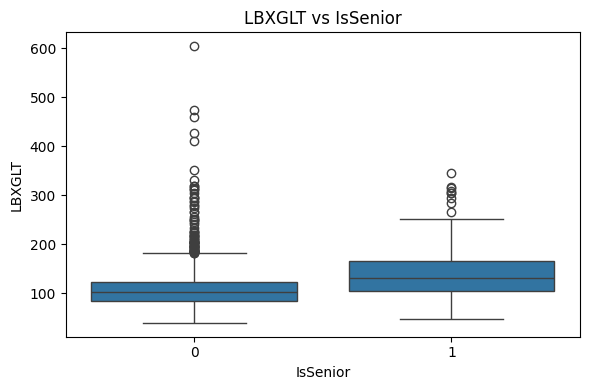

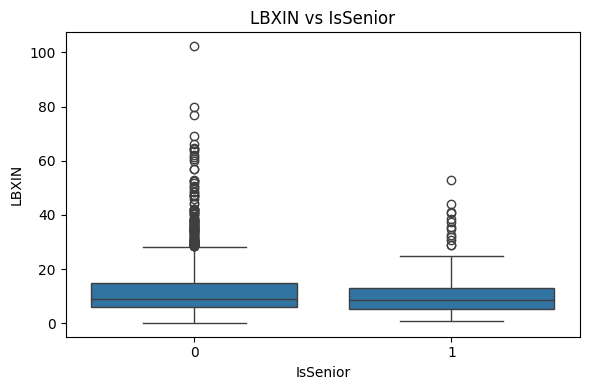

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=train_df, x='IsSenior', y=col)
    plt.title(f"{col} vs IsSenior")
    plt.tight_layout()
    plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


# 1. Create interaction features
train_df['GLU_IN_RATIO'] = train_df['LBXGLU'] / (train_df['LBXIN'] + 1)
train_df['BMI_GLU'] = train_df['BMXBMI'] * train_df['LBXGLU']

test_df['GLU_IN_RATIO'] = test_df['LBXGLU'] / (test_df['LBXIN'] + 1)
test_df['BMI_GLU'] = test_df['BMXBMI'] * test_df['LBXGLU']

# 2. Log transform for skewed data (insulin)
train_df['LBXIN_log'] = np.log1p(train_df['LBXIN'])
test_df['LBXIN_log'] = np.log1p(test_df['LBXIN'])

# 3. Prepare final feature set
X = train_df.drop(columns='IsSenior')
y = train_df['IsSenior']

# 4. Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# 5. Handle imbalance with SMOTE
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

# 6. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_val_scaled = scaler.transform(X_val)
test_scaled = scaler.transform(test_df)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Split features & target
X = train_df.drop(columns='IsSenior')
y = train_df['IsSenior']

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# SMOTE for balancing
sm = SMOTE(random_state=42)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_val_scaled = scaler.transform(X_val)
test_scaled = scaler.transform(test_df)

# Model
model = RandomForestClassifier(random_state=42, class_weight='balanced')
model.fit(X_train_scaled, y_train_smote)

# Predict
y_pred = model.predict(X_val_scaled)

# Evaluate
print("F1 Score:", f1_score(y_val, y_pred))
print("\nClassification Report:\n", classification_report(y_val, y_pred))


F1 Score: 0.25396825396825395

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86       328
           1       0.25      0.25      0.25        63

    accuracy                           0.76       391
   macro avg       0.56      0.56      0.56       391
weighted avg       0.76      0.76      0.76       391



In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, classification_report

# Train XGBoost
xgb_model = XGBClassifier(
    scale_pos_weight=3,  # adjust depending on imbalance ratio
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_model.fit(X_train_scaled, y_train_smote)

# Predict on validation
y_val_probs = xgb_model.predict_proba(X_val_scaled)[:, 1]

# Optional: Tune threshold
threshold = 0.35
y_val_pred = (y_val_probs >= threshold).astype(int)

# Evaluate
print("F1 Score:", f1_score(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))


F1 Score: 0.2976190476190476

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.76      0.81       328
           1       0.24      0.40      0.30        63

    accuracy                           0.70       391
   macro avg       0.55      0.58      0.55       391
weighted avg       0.77      0.70      0.73       391



In [ ]:
for t in [0.5, 0.45, 0.4, 0.35, 0.3, 0.25]:
    y_val_pred = (y_val_probs >= t).astype(int)
    f1 = f1_score(y_val, y_val_pred)
    print(f"Threshold {t} → F1 Score: {f1:.4f}")


Threshold 0.5 → F1 Score: 0.2857
Threshold 0.45 → F1 Score: 0.3026
Threshold 0.4 → F1 Score: 0.2893
Threshold 0.35 → F1 Score: 0.2976
Threshold 0.3 → F1 Score: 0.3023
Threshold 0.25 → F1 Score: 0.3279


In [ ]:
import pandas as pd
from google.colab import files

# ✅ 1. Predict probabilities on test set
test_probs = xgb_model.predict_proba(test_scaled)[:, 1]

# ✅ 2. Apply best threshold
threshold = 0.30  # or your optimal one
test_preds = (test_probs >= threshold).astype(int)  # results: 0 for Adult, 1 for Senior

# ✅ 3. Create submission DataFrame with expected format
submission = pd.DataFrame({'age_group': test_preds})

# ✅ 4. Inspect submission
print("✅ Sample submission preview:")
print(submission.head())

# ✅ 5. Check row count
print("\n✅ Submission rows:", len(submission))

# ✅ 6. Save to CSV
submission.to_csv("submission.csv", index=False)

# ✅ 7. Download
files.download("submission.csv")




✅ Sample submission preview:
   age_group
0          0
1          0
2          1
3          0
4          0

✅ Submission rows: 312


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
test_data = pd.read_csv("/content/Test_Data.csv")
submission = pd.read_csv("submission.csv")

print("✅ Test set rows:      ", len(test_data))
print("✅ Submission rows:    ", len(submission))

if len(test_data) == len(submission):
    print("✅ Row count matches. Ready to submit!")
else:
    print("❌ Mismatch in rows! Double-check your prediction logic.")


✅ Test set rows:       312
✅ Submission rows:     312
✅ Row count matches. Ready to submit!
